Data Handling

Loading the dataset from the csv, removing duplicates and corrupted values

In [318]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import json
import csv

# df = pd.read_csv("Amazon Items Cleaned.csv")
df = pd.read_csv("newitems_df_last.csv")
print('Shape before cleaning: ' + str(df.shape))

# Remove Corrupted Rows ---------------------------------------------------------------------
df = df.dropna(axis = 0, thresh=8)
print('Shape after removing corrupted: ' + str(df.shape))

# Drop Duplicates --------------------------------------------------------------------------
df = df.drop_duplicates(subset = None, keep = 'first')
print('Shape after removing duplicates: ' + str(df.shape))



Shape before cleaning: (8037, 8)
Shape after removing corrupted: (1070, 8)
Shape after removing duplicates: (975, 8)


Cleaning and normalizing the data

In [319]:
# Function - Delete char in string ---------------------------------------------------------

def deleteCharInString(df, c) :
    ilist = list()
    for i in df :
        ilist.append(i.replace(c, ''))
    df = ilist
    return df

In [320]:
# Cleaning the Brand name ------------------------------------------------------------------

df.Brand = deleteCharInString(df.Brand, "Brand:")
df.Brand = deleteCharInString(df.Brand, "Visit the ")
df.Brand = deleteCharInString(df.Brand, " Store")

print(df.Brand)

2               SanDisk
3              EchoGear
10                 NOCO
17         AmazonBasics
19        Amazon Basics
             ...       
7875     American Eagle
7894             Amazon
7905             Amazon
7934             Amazon
8020          Frito-Lay
Name: Brand, Length: 975, dtype: object


In [321]:
# # Cleaning the Ratings ------------------------------------------------------------------

df.Rating = deleteCharInString(df.Rating, " ratings")
df.Rating = deleteCharInString(df.Rating, " rating")
df.Rating = deleteCharInString(df.Rating, ",")
df["Rating"] = df.Rating.astype(float)
df = df.reset_index(drop=True)
print(df.Rating)

0      67912.0
1      13989.0
2       3874.0
3      16259.0
4      12334.0
        ...   
970     5999.0
971     3950.0
972     7520.0
973     3014.0
974    17706.0
Name: Rating, Length: 975, dtype: float64


In [340]:
# Cleaning the Stars ------------------------------------------------------------------
#changed to removing the row
df.Stars = deleteCharInString(df.Stars, " out of 5")
ilist = list()
for i in df.Stars :
    ilist.append(i.replace("How confident are you in finding a size that will fit you well?", '0'))
df.Stars = ilist
ilist = list()
for i in df.Stars :
    ilist.append(i.replace("|", '0'))
df.Stars = ilist
ilist = list()
for i in df.Stars :
    ilist.append(i.replace("confirmed", '0'))
df.Stars = ilist
ilist = list()
for i in df.Stars :
    ilist.append(i.replace("4,8 von 5", '4.8'))
df.Stars = ilist

df



,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
0,Made for Amazon SanDisk 128GB microSD Memory C...,SanDisk,67912.0,0,1,1000.0,15.30,4.6
1,Made for Amazon Outlet Shelf for Amazon Echo D...,EchoGear,13989.0,0,0,125.0,14.99,4.6
2,"NOCO NUSB211NA 10W USB Power Adapter, 2.1A 5V ...",NOCO,3874.0,0,0,28.0,13.95,4.7
3,Amazon Basics Universal Travel Case Organizer ...,AmazonBasics,16259.0,0,1,277.0,14.44,4.6
4,Amazon Basics Hard Travel Carrying Case for 5 ...,Amazon Basics,12334.0,0,1,106.0,10.85,4.6
...,...,...,...,...,...,...,...,...
970,American Eagle Gift Card,American Eagle,5999.0,0,0,4.0,25.00,4.9
971,Amazon.com Gift Cards - As a Bookmark,Amazon,3950.0,0,0,15.0,100.00,4.9
972,Amazon.com Gift Card in a Gift Tag,Amazon,7520.0,0,0,12.0,10.00,4.9
973,"Amazon.com $10 Gift Cards, Pack of 3 (Holiday ...",Amazon,3014.0,0,0,3.0,30.00,4.9


In [323]:
# Cleaning the Price ------------------------------------------------------------------

df.Price = deleteCharInString(df.Price, "$")
df.Price = deleteCharInString(df.Price, ",")
df["Price"] = df.Price.astype(float)
df = df.reset_index(drop=True)
print(df.Price)

0       15.30
1       14.99
2       13.95
3       14.44
4       10.85
        ...  
970     25.00
971    100.00
972     10.00
973     30.00
974     28.00
Name: Price, Length: 975, dtype: float64


In [324]:
# Cleaning the Comments ------------------------------------------------------------------

df.Comments = deleteCharInString(df.Comments, "+")
df.Comments = deleteCharInString(df.Comments, " answered questions")
df["Comments"] = df.Comments.astype(float)
df = df.reset_index(drop=True)
print(df.Comments)


0      1000.0
1       125.0
2        28.0
3       277.0
4       106.0
        ...  
970       4.0
971      15.0
972      12.0
973       3.0
974      33.0
Name: Comments, Length: 975, dtype: float64


In [325]:
df.to_csv('datatest.csv',index= None)

First look on the data

In [326]:
# Non null means our data is full without missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          975 non-null    object 
 1   Brand         975 non-null    object 
 2   Rating        975 non-null    float64
 3   BestSeller    975 non-null    int64  
 4   AmazonChoice  975 non-null    int64  
 5   Comments      975 non-null    float64
 6   Price         975 non-null    float64
 7   Stars         975 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 61.1+ KB


Checking data after cleaning

In [327]:

df.describe(include='all')

,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
count,975,975,975.000000,975.000000,975.000000,975.000000,975.000000,975
unique,965,678,NaN,NaN,NaN,NaN,NaN,22
top,"Rubbermaid Reveal Power Scrubber, Grout & Tile...",Amazon,NaN,NaN,NaN,NaN,NaN,4.4
freq,3,34,NaN,NaN,NaN,NaN,NaN,154
mean,NaN,NaN,6334.157949,0.026667,0.267692,74.847179,70.456800,NaN
std,NaN,NaN,19058.505044,0.161190,0.442984,160.370670,177.704843,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,3.000000,3.490000,NaN
25%,NaN,NaN,214.000000,0.000000,0.000000,7.000000,14.990000,NaN
50%,NaN,NaN,888.000000,0.000000,0.000000,20.000000,25.950000,NaN
75%,NaN,NaN,3934.000000,0.000000,1.000000,60.500000,51.205000,NaN


Frequency table check for best seller items

we can see in the pie chart that 2.8% of overall products

   BestSeller  Frequency          p
0           0        949  97.333333
1           1         26   2.666667


<AxesSubplot:ylabel='BestSeller'>

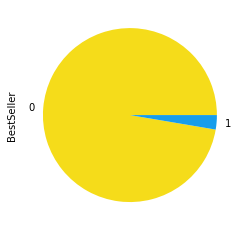

In [328]:
# Show the Frequency of the Best Sellers items with PIE visualization -------------------------------------------------------------------------------

counts = df["BestSeller"].value_counts()
p = df["BestSeller"].value_counts(normalize = True) * 100
index = [0,1]
FrequencyDF = pd.DataFrame({"BestSeller" : index,"Frequency": counts, "p" : p})
print(FrequencyDF)

myColors = ['#F5DC1A', '#179deb']
df['BestSeller'].value_counts().plot(kind = 'pie', colors = myColors)


(1.184, 464.692]        956
(464.692, 925.894]       12
(1848.298, 2309.5]        4
(1387.096, 1848.298]      2
(925.894, 1387.096]       1
Name: Price, dtype: int64


(array([956.,  12.,   1.,   2.,   4.]),
 array([   3.49 ,  464.692,  925.894, 1387.096, 1848.298, 2309.5  ]),
 <BarContainer object of 5 artists>)

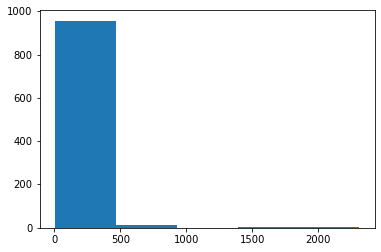

In [329]:
# We can see that most of the items in amazon are falling under the first section in the histogram price < 500 ------------------------------------------------

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

print(pd.cut(df["Price"], bins=5).value_counts())
plt.hist(df["Price"], bins = 5)

(array([956.,  12.,   1.,   2.,   4.]),
 array([   3.49 ,  464.692,  925.894, 1387.096, 1848.298, 2309.5  ]),
 <BarContainer object of 5 artists>)

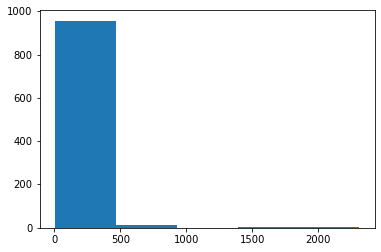

In [330]:
# Finding the amount of Exception in Price --------------------------------------------

plt.hist(df.Price, bins = 5)

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

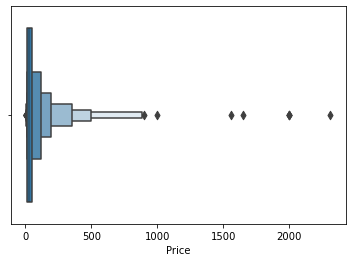

In [331]:
import seaborn as sns

sns.boxenplot(df.Price)

In [341]:
df.Price.describe()


print(df["Price"].describe())

Q1 = np.percentile(df["Price"], 25)
Q3 = np.percentile(df["Price"], 75)
IQR = Q3 - Q1

fareOutlierRows = df[(df["Price"] < Q1 - 1.5 * IQR) | (df["Price"] > Q3 - 1.5 * IQR )].index
print(len(fareOutlierRows))

count     975.000000
mean       70.456800
std       177.704843
min         3.490000
25%        14.990000
50%        25.950000
75%        51.205000
max      2309.500000
Name: Price, dtype: float64
975


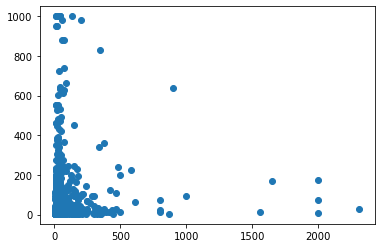

In [333]:
# Here we can see that the amount of comments on an item does not affect the stars the item gets

# plt.scatter(df.Comments, df.Stars)
# plt.scatter(df.Price, df.Stars)
plt.scatter(df.Price, df.Comments)
# plt.scatter(df.Price, df.BestSeller)
# plt.scatter(df.Price, df.Rating)
# plt.scatter(df.Comments, df.Rating)
# plt.scatter(df.Comments, df.Stars)


In [334]:
df.Price[df.Price < 500].count()/df.Price.count()

print(df.Price[df.Price > 500].count())
# df.Price[df.Price > 1000] = np.nan

# print(df.shape)

# df = df.dropna(axis= 0 , thresh= 8)

# print(df.shape)

# df.Price.describe()




14


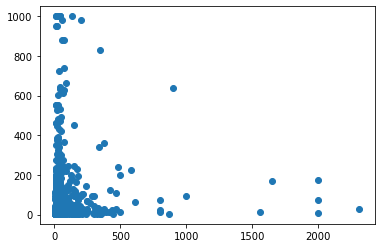

In [335]:
plt.scatter(df.Price, df.Comments)


In [336]:
z_comments = (df['Comments'] - df['Comments'].mean()) / df['Comments'].std()
outliers = abs(z_comments) < 1000
sum(outliers)


975

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

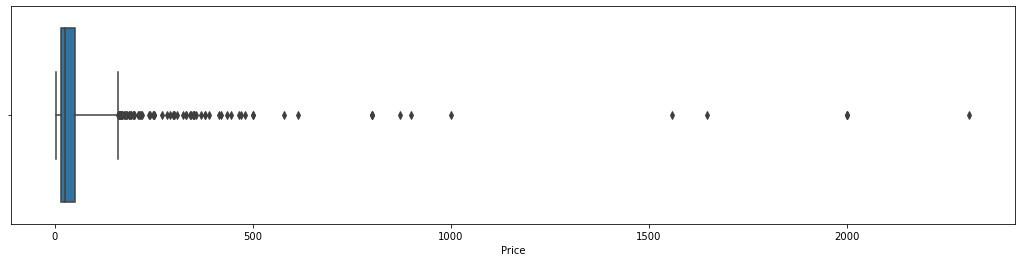

In [337]:


fig = plt.figure(figsize=(18,4))
sns.boxplot(df.Price, whis=3)

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Comments'>

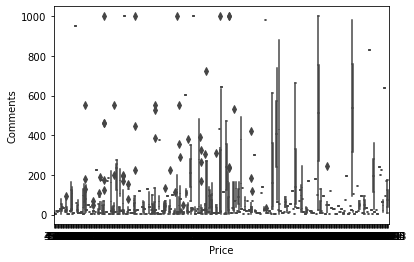

In [338]:
sns.boxplot(df.Price,df.Comments)

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Comments'>

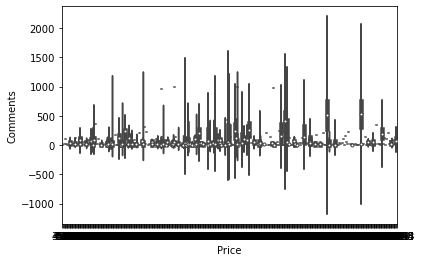

In [339]:
sns.violinplot(df.Price,df.Comments)